# Potential Talents

In [71]:
#Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [72]:
#loading the data
potential_talent=pd.read_excel('potential-talents.xlsx')
#Copy dataset
pt = potential_talent.copy()
pt.head()

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


In [73]:
pt.shape

(104, 5)

In [74]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          104 non-null    int64  
 1   job_title   104 non-null    object 
 2   location    104 non-null    object 
 3   connection  104 non-null    object 
 4   fit         0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.2+ KB


#### There no null entries but the column 'fit' is empty.

In [75]:
#Duplicated Rows
pt.loc[pt.duplicated(), :]
print(pt.duplicated().sum())

0


#### There are no duplicate rows.

In [76]:
pt.isnull().sum()

id              0
job_title       0
location        0
connection      0
fit           104
dtype: int64

In [77]:
#Counting the number of 'unknown' string in the categorical columns
pt['job_title'].str.contains('unk').sum()

0

In [78]:
pt['location'].str.contains('unk').sum()

0

In [79]:
pt['connection'].str.contains('unk').sum()

0

In [80]:
# Basic stats for categorical columns
pt.describe(include=object)

,job_title,location,connection
count,104,104,104
unique,52,41,33
top,2019 C.T. Bauer College of Business Graduate (...,Kanada,500+
freq,7,12,44


#### There are 52 unique job titles, 41 unique locations and 33 respondents with more than 500+ connections.

### Data Exploration

In [81]:
#Unique job titles
pt.job_title.value_counts()

job_title
2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional                 7
Aspiring Human Resources Professional                                                                                    7
Student at Humber College and Aspiring Human Resources Generalist                                                        7
People Development Coordinator at Ryan                                                                                   6
Native English Teacher at EPIK (English Program in Korea)                                                                5
Aspiring Human Resources Specialist                                                                                      5
HR Senior Specialist                                                                                                     5
Student at Chapman University                                                                                            4
SVP, C

In [82]:
#Location
pt.location.value_counts()

location
Kanada                                 12
Raleigh-Durham, North Carolina Area     8
Houston, Texas Area                     8
Greater New York City Area              7
Houston, Texas                          7
Denton, Texas                           6
San Francisco Bay Area                  5
Greater Philadelphia Area               5
İzmir, Türkiye                          4
Lake Forest, California                 4
Atlanta, Georgia                        4
Chicago, Illinois                       2
Austin, Texas Area                      2
Greater Atlanta Area                    2
Amerika Birleşik Devletleri             2
Long Beach, California                  1
Milpitas, California                    1
Greater Chicago Area                    1
Torrance, California                    1
Greater Los Angeles Area                1
Bridgewater, Massachusetts              1
Lafayette, Indiana                      1
Kokomo, Indiana Area                    1
Las Vegas, Nevada Area   

In [83]:
#Wordcloud for visualization
from wordcloud import WordCloud
def generate_word_cloud(column):
    job_text = " ".join(item for item in column)
    plt.figure(figsize=(10, 5))
    word_cloud = WordCloud(max_font_size=50, max_words=100, 
                           collocations=False, background_color="#b3cccc",).generate(job_text)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

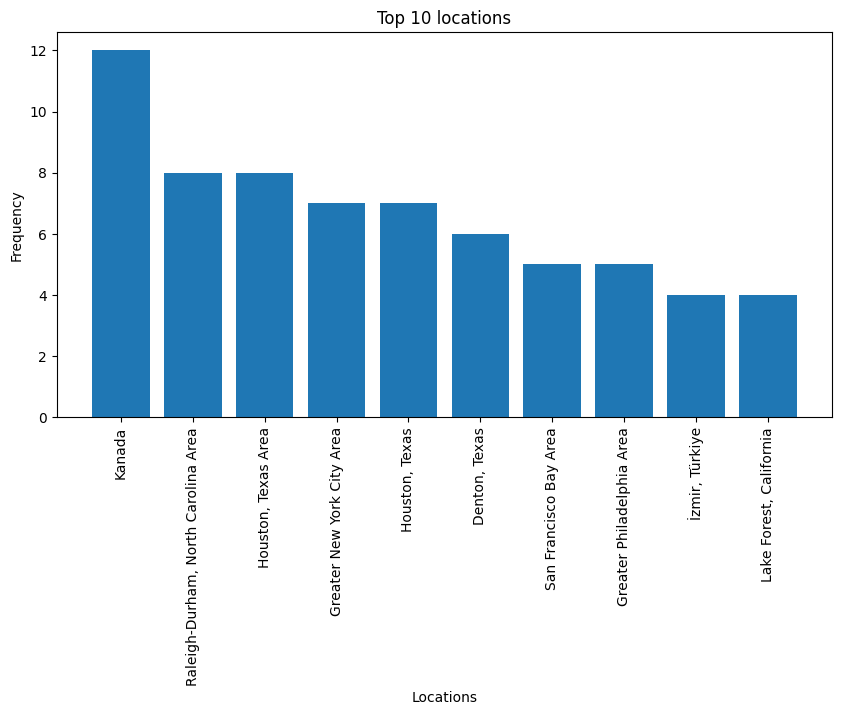

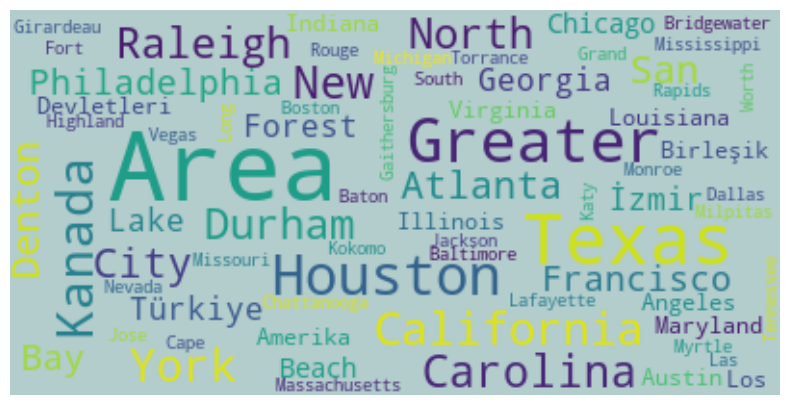

In [84]:
# Top 10 locations
plt.figure(figsize=(10, 5))
plt.bar(pt.location.value_counts().index[: 10], pt.location.value_counts()[: 10])
plt.xticks(rotation=90)
plt.title("Top 10 locations")
plt.xlabel("Locations")
plt.ylabel("Frequency")
plt.show()
    
generate_word_cloud(pt['location'])

#### The top 10 locations are Canada, some cities in the US and Izmir, Turkey.

### Data Cleaning

In [85]:
#Preprocessing function
import nltk, re
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
stemmer = PorterStemmer() 
lemmatizer=WordNetLemmatizer()

def clean_string(text, stem="None"):

    final_string = ""
    
    # Remove all the special characters
    text = re.sub(r'\W', ' ', str(text))

    # Remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)

    # Removing prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    
    # Make text lower case
    text = text.lower()
        
    # Remove stop words
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
   
    text_filtered = [word for word in text if not word in useless_words]

    # Remove numbers
    text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]
    
    #Stemming & Lemmatization (pos='v' means verb)
    if stem == 'Stem':
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    else:
        text_stemmed = [lemmatizer.lemmatize(y,pos='v') for y in text_filtered]

    final_string = ' '.join(text_stemmed)
    
    # Removing whitespace from the start of the string
    final_string = final_string.lstrip()
    
    # Substituting multiple spaces with single space
    final_string = re.sub(r'\s+', ' ', final_string, flags=re.I)
    
    return final_string

pt['job_title']=pt['job_title'].apply(lambda x: clean_string(x))
pt.iloc[0]['job_title']

'bauer college business graduate magna cum laude aspire human resources professional'

In [86]:
#Correcting Spelling Error in the location column

pt['location']=pt['location'].str.replace("Türkiye","Turkey", regex=True)
pt['location']=pt['location'].str.replace("Kanada","Canada", regex=True)
pt['location']=pt['location'].str.replace("Amerika Birleşik Devletleri","United States of America", regex=True)
pt.head()


,id,job_title,location,connection,fit
0,1,bauer college business graduate magna cum laud...,"Houston, Texas",85,NaN
1,2,native english teacher epik english program korea,Canada,500+,NaN
2,3,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,people development coordinator ryan,"Denton, Texas",500+,NaN
4,5,advisory board member celal bayar university,"İzmir, Turkey",500+,NaN


In [87]:
# Replace abreviations by there real texts
pt.replace({'job_title' : { 'chro' : 'chief human resources officer', 'svp' : 'senior vice president'
        ,'gphr' : 'global professional in human resources','hris' : 'human resources information system'
        , 'csr' : 'corporate social responsibility', 'sphr' : 'Senior Professional in Human Resources'
        , 'hr' : 'human resources', 'rrp': 'recommended retail price'}}, regex=True, inplace=True)

### We cleaned the data, corrected some spelling erros and replaced abbreviations with real text before tokenization.

In [88]:
#Unique job titles once again
pt.job_title.value_counts()

job_title
bauer college business graduate magna cum laude aspire human resources professional                                                                                                                                               7
aspire human resources professional                                                                                                                                                                                               7
student humber college aspire human resources generalist                                                                                                                                                                          7
people development coordinator ryan                                                                                                                                                                                               6
native english teacher epik english program korea                             

In [89]:
#Recovering top 10 words in job_titles
word_dict = {}

for i in pt['job_title']:
    for word in i.split(" "):
        if word not in word_dict:
            word_dict[word] = 1
        else:
            word_dict[word] = word_dict[word] + 1
            
print("Top 10 frequently used words:")

pd.DataFrame({'Words': word_dict.keys(), 
              'Frequency': word_dict.values()}).sort_values(by=['Frequency'], ascending=False).head(10)

Top 10 frequently used words:


,Words,Frequency
9,resources,81
8,human,81
7,aspire,35
10,professional,24
28,student,16
32,seek,15
30,generalist,14
1,college,14
26,university,12
27,specialist,12


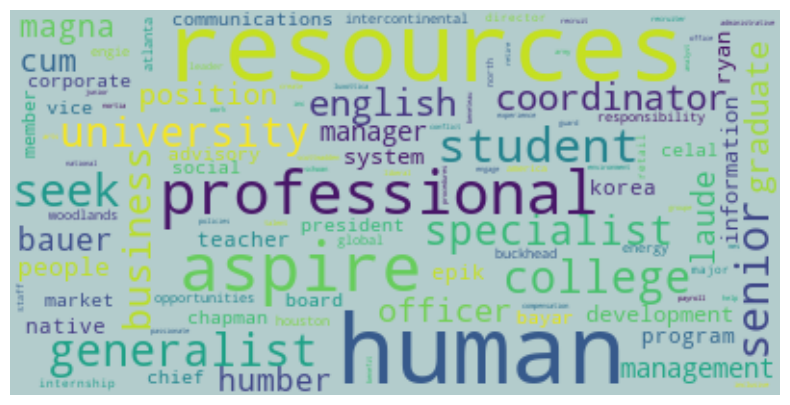

In [90]:
# WordCloud for job titles
generate_word_cloud(pt['job_title'])

#### The most common words in the job_title column are human, resources, aspire and professional.

## Ranking Candidates Based on a Fitness Score (Keywords)

In [91]:
#Applying TF-IDF (Term Frequency-Inverse Document Frequency) to calculate how relevant a word is.
#Cosine similarity gives a useful measure of how similar two documents (job titles in this case) are likely to be, 
#in terms of their subject matter, and independently of the length of the documents.
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity
ranking_pt=potential_talent.copy()

def rank_candidates_tfidf(keyword,pt,feature_name):
    #store cleaned rows into a list
    corpus=pt[feature_name].tolist()
    #apply preprocessing on keyword
    keyword=clean_string(keyword)
    #create an instance of tfidfVectorizer
    tfv = TfidfVectorizer()
    #Add the cleaned keyword to the corpus list 
    corpus.append(keyword)
    #fit the Tfidf vectorizer on the cleaned data
    key_tf=tfv.fit_transform(corpus)
    #create a dataframe that contains tfidf values of each token for each row in the data
    ## Get the feature names using the vocabulary_ attribute
    vocabulary = tfv.vocabulary_
    feature_names = list(vocabulary.keys())
    key_df=pd.DataFrame(key_tf.toarray(), columns=feature_names)
    shape=key_df.shape
    #calculate the cosine similarity between the keyword and the data's rows
    cosine_sim = cosine_similarity(key_tf.toarray()[:shape[0]-1], key_tf.toarray()[shape[0]-1].reshape(1, -1))
    #Add cosine resluts into a new column fit
    pt['fit_tfidf']=cosine_sim
    #store the ranked candidates based on the fit score
    final_pt=pt.sort_values('fit_tfidf',ascending=False)
    #remove the keyword added to reuse the function again on other different keywords
    corpus.pop()
    return final_pt

In [92]:
#Using the keyword given
keyword='aspiring human resources'
ranking_pt=rank_candidates_tfidf(keyword,pt,"job_title")
#No of ranked candidates based on the keyword
print('There are',ranking_pt[ranking_pt['fit_tfidf']!=0].shape[0],'ranked candidates for the job',keyword)

There are 71 ranked candidates for the job aspiring human resources


In [93]:
ranking_pt

,id,job_title,location,connection,fit,fit_tfidf
16,17,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236
2,3,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236
96,97,aspire human resources professional,"Kokomo, Indiana Area",71,NaN,0.756236
45,46,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236
20,21,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236
...,...,...,...,...,...,...
58,59,people development coordinator ryan,"Denton, Texas",500+,NaN,0.000000
62,63,student chapman university,"Lake Forest, California",2,NaN,0.000000
34,35,advisory board member celal bayar university,"İzmir, Turkey",500+,NaN,0.000000
10,11,student chapman university,"Lake Forest, California",2,NaN,0.000000


In [94]:
#Word2Vec
from gensim.models import Word2Vec as w2v
from nltk import word_tokenize
nltk.download('punkt')
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
word2vec_output_file = "glove"+'.word2vec'
glove2word2vec("glove.6B.100d.txt", word2vec_output_file)

def gettokens_word2vec(keyword,pt,feature_name):
    #store cleaned rows into a list
    corpus=pt[feature_name].tolist()
    #apply preprocessing on keyword
    keyword=clean_string(keyword)
    #Append the cleaned keyword to th corpus list 
    corpus.append(keyword)
    #create tokens from our corpus
    corpus_tokens = [word_tokenize(line) for line in corpus]
    #create an instance of word2vec
    w = w2v(corpus_tokens, min_count=2, window=5)# min_count considers sentences with more than 3 words  
    #build vocab from the corpus
    w.build_vocab(corpus_tokens, progress_per=1000)
    #Get top 10 similar words to 'resources'
    print('Top 10 similar words to the word "resources":',w.wv.most_similar('resources', topn=10))
    return corpus_tokens, w

keyword='aspiring human resources'
corpus_tokens, w = gettokens_word2vec(keyword,pt,'job_title')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dansh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 similar words to the word "resources": [('Professional', 0.2505117952823639), ('social', 0.21563605964183807), ('bauer', 0.21276454627513885), ('north', 0.20580117404460907), ('corporate', 0.16575680673122406), ('engie', 0.14038264751434326), ('student', 0.1297401487827301), ('seek', 0.10691073536872864), ('humber', 0.10564550757408142), ('global', 0.09483020007610321)]


In [95]:
#function to join tokens with average of each sentence
def sentence_vector(corpus,w):
    line_vec=np.array(0)
    l=list()
    for i in corpus:
        a=0
        for j in i:
            try:
                a=a+1
                line_vec=line_vec+w.wv[j] 
            except:
                line_vec=line_vec
        l.append(line_vec/a)
    return l

corpus_tokens[:2]


[['bauer',
  'college',
  'business',
  'graduate',
  'magna',
  'cum',
  'laude',
  'aspire',
  'human',
  'resources',
  'professional'],
 ['native', 'english', 'teacher', 'epik', 'english', 'program', 'korea']]

In [96]:
#Main function
def rank_candidates_word2vec(pt):
    # Join tokens with average of each sentence
    all_vec=sentence_vector(corpus_tokens,w)
    # Create a dataframe that contains word2vec vectors
    vec_pt=pd.DataFrame(all_vec)
    shape=vec_pt.shape
    # Explore keys created with their indexes
    w.wv.key_to_index
    # Calculate the cosine similarity between the keyword and the data's rows
    cosine_sim = cosine_similarity(all_vec[:shape[0]-1], all_vec[shape[0]-1].reshape(1, -1))
    # Add cosine resluts into a new column fit
    pt['fit_word2vec']=cosine_sim
    #store the ranked candidates based on the fit score
    final_pt_w2w=pt.sort_values('fit_word2vec',ascending=False)
    # Remove the keyword added to reuse the function again on other different keywords
    corpus_tokens.pop()
    return final_pt_w2w

ranking_pt=rank_candidates_word2vec(ranking_pt)

#No of ranked candidates based on the keyword
print('There are',ranking_pt[ranking_pt['fit_word2vec']!=0].shape[0],'ranked candidates for the job',keyword)

There are 104 ranked candidates for the job aspiring human resources


In [97]:
ranking_pt

,id,job_title,location,connection,fit,fit_tfidf,fit_word2vec
103,104,director administration excellence log,"Katy, Texas",500+,NaN,0.000000,0.999983
34,35,advisory board member celal bayar university,"İzmir, Turkey",500+,NaN,0.000000,0.999966
10,11,student chapman university,"Lake Forest, California",2,NaN,0.000000,0.999966
62,63,student chapman university,"Lake Forest, California",2,NaN,0.000000,0.999952
58,59,people development coordinator ryan,"Denton, Texas",500+,NaN,0.000000,0.999916
...,...,...,...,...,...,...,...
96,97,aspire human resources professional,"Kokomo, Indiana Area",71,NaN,0.756236,0.744291
45,46,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.740031
20,21,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.688426
16,17,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.682524


In [98]:
#Glove: Global Vector. Focuses on words co-occurrences over the whole corpus. 
#Its embeddings relate to the probabilities that two words appear together. 
#function to get tokens and the word2vec model

def gettokens_glove2vec(keyword,pt,feature_name,glove_path):
    #store cleaned rows into a list
    corpus=pt[feature_name].tolist()
    #apply preprocessing on keyword
    keyword=clean_string(keyword)
    #Append the cleaned keyword to th corpus list 
    corpus.append(keyword)
    #create tokens from our corpus
    corpus_tokens = [word_tokenize(line) for line in corpus]
    #create an instance of Glove model
    glove2vec_file = glove_path
    model_glove = KeyedVectors.load_word2vec_format(glove2vec_file, binary=False) 
    return corpus_tokens, model_glove

In [99]:
#function to join tokens with average of each sentence
def sentence_vector_glove(corpus,glove):
    line_vec=np.array(0)
    l=list()
    for i in corpus:
        a=0
        for j in i:
            try:
                a=a+1
                line_vec=line_vec+glove.get_vector(j)
            except:
                line_vec=line_vec
        l.append(line_vec/a)
    return l

#final main function
def rank_candidates_glove(pt):
    #join tokens with average of each sentence
    all_vec_glove=sentence_vector_glove(corpus_tokens,glove)
    #create a dataframe that contains word2vec vectors
    vec_pt_glove=pd.DataFrame(all_vec_glove)
    shape=vec_pt_glove.shape
    #calculate the cosine similarity between the keyword and the data's rows
    cosine_simg = cosine_similarity(all_vec_glove[:shape[0]-1], all_vec_glove[shape[0]-1].reshape(1, -1))
    #Add cosine resluts into a new column fit
    pt['fit_glove']=cosine_simg
    #store the ranked candidates based on the fit score
    final_pt_glove=pt.sort_values('fit_glove',ascending=False)
    #remove the keyword added to reuse the function again on other different keywords
    corpus_tokens.pop()
    return final_pt_glove

In [100]:
keyword='aspire human resources'
corpus_tokens, glove = gettokens_glove2vec(keyword,pt,'job_title',"glove.word2vec")

ranking_pt=rank_candidates_glove(ranking_pt)

#No of ranked candidates based on the keyword
print('There are',ranking_pt[ranking_pt['fit_glove']!=0].shape[0],'ranked candidates for the job',keyword)

There are 104 ranked candidates for the job aspire human resources


In [101]:
ranking_pt

,id,job_title,location,connection,fit,fit_tfidf,fit_word2vec,fit_glove
2,3,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.594646,0.999995
16,17,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.682524,0.999991
20,21,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.688426,0.999981
45,46,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.740031,0.999968
96,97,aspire human resources professional,"Kokomo, Indiana Area",71,NaN,0.756236,0.744291,0.999962
...,...,...,...,...,...,...,...,...
58,59,people development coordinator ryan,"Denton, Texas",500+,NaN,0.000000,0.999916,0.937000
62,63,student chapman university,"Lake Forest, California",2,NaN,0.000000,0.999952,0.935353
10,11,student chapman university,"Lake Forest, California",2,NaN,0.000000,0.999966,0.902601
34,35,advisory board member celal bayar university,"İzmir, Turkey",500+,NaN,0.000000,0.999966,0.847090


In [105]:
#Bert: Bidirectional Encoder Representations from Transformers
#Load the pretrained model 
from sentence_transformers import SentenceTransformer
bert = SentenceTransformer('all-MiniLM-L6-v2')

def rank_candidates_bert(keyword,pt,feature_name):
    #store cleaned rows into a list
    corpus=pt[feature_name].tolist()
    #apply preprocessing on keyword
    keyword=clean_string(keyword)
    #Add the cleaned keyword to the corpus list 
    corpus.append(keyword)
    #encode our sentences
    sentence_embeddings = bert.encode(corpus)
    shape=sentence_embeddings.shape
    #calculate the cosine similarity between the keyword and the data's rows
    cosine_sim = cosine_similarity(sentence_embeddings[:shape[0]-1], sentence_embeddings[shape[0]-1].reshape(1, -1))
    #Add cosine resluts into a new column fit
    pt['fit_bert']=cosine_sim
    #store the ranked candidates based on the fit score
    final_pt_bert=pt.sort_values('fit_bert',ascending=False)
    #remove the keyword added to reuse the function again on other different keywords
    corpus.pop()
    return final_pt_bert


In [107]:
keyword='aspire human resources'
ranking_pt=rank_candidates_bert(keyword,ranking_pt,'job_title')

#No of ranked candidates based on the keyword
print('There are',ranking_pt[ranking_pt['fit_bert']!=0].shape[0],'ranked candidates for the job',keyword)

Shape of encoded sentences: (105, 384)
There are 104 ranked candidates for the job aspire human resources


In [108]:
ranking_pt

,id,job_title,location,connection,fit,fit_tfidf,fit_word2vec,fit_glove,fit_bert
2,3,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.594646,0.999995,0.928787
20,21,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.688426,0.999981,0.928787
45,46,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.740031,0.999968,0.928787
96,97,aspire human resources professional,"Kokomo, Indiana Area",71,NaN,0.756236,0.744291,0.999962,0.928787
32,33,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.796866,0.999929,0.928787
...,...,...,...,...,...,...,...,...,...
44,45,native english teacher epik english program korea,Canada,500+,NaN,0.000000,0.998913,0.986633,0.154695
31,32,native english teacher epik english program korea,Canada,500+,NaN,0.000000,0.998842,0.988095,0.154695
92,93,admissions representative community medical ce...,"Long Beach, California",9,NaN,0.000000,0.996129,0.990997,0.145111
84,85,recommended retail price brand portfolio execu...,Greater Philadelphia Area,500+,NaN,0.000000,0.998561,0.984023,0.108290


#### Based on the results, TF-IDF, Glove and Bert seem to correctly rank the candidates based on the keyword provided. We will therefore use the average of those 3 scores for the final ranking used in the fit column.

In [113]:
#Column fit will be average of fit_tfidf, glove and bert
ranking_pt['fit']=ranking_pt[['fit_tfidf','fit_glove','fit_bert']].mean(axis=1)
ranking_pt=ranking_pt.sort_values('fit',ascending=False)
ranking_pt

,id,job_title,location,connection,fit,fit_tfidf,fit_word2vec,fit_glove,fit_bert
2,3,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,0.895006,0.756236,0.594646,0.999995,0.928787
16,17,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,0.895005,0.756236,0.682524,0.999991,0.928787
20,21,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,0.895002,0.756236,0.688426,0.999981,0.928787
45,46,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,0.894997,0.756236,0.740031,0.999968,0.928787
96,97,aspire human resources professional,"Kokomo, Indiana Area",71,0.894995,0.756236,0.744291,0.999962,0.928787
...,...,...,...,...,...,...,...,...,...
103,104,director administration excellence log,"Katy, Texas",500+,0.373153,0.000000,0.999983,0.812654,0.306805
15,16,native english teacher epik english program korea,Canada,500+,0.370776,0.000000,0.999814,0.957633,0.154695
84,85,recommended retail price brand portfolio execu...,Greater Philadelphia Area,500+,0.364104,0.000000,0.998561,0.984023,0.108290
34,35,advisory board member celal bayar university,"İzmir, Turkey",500+,0.351863,0.000000,0.999966,0.847090,0.208498


### Reranking candidates when candidate is starred